In [144]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

covidDF = pd.read_csv("covid.csv")
breastDF = pd.read_csv("breast.csv")
#Type of intervention, Eligibility, Results presented

covidDF['Conditions'] = "Covid"
breastDF['Conditions'] = "Breast Cancer"
#Combine the two datasets
combinedDF = pd.concat([covidDF, breastDF])
combinedDF.head()
#For the Status column, rename WITHDRAWN, TERMINATED, and SUSPENDED to STOPPED
combinedDF['Status'] = combinedDF['Status'].replace(['WITHDRAWN', 'TERMINATED', 'SUSPENDED'], 'STOPPED')
#For the status column, rename RECRUITING, ENROLLING BY INVITATION, and ACTIVE, NOT RECRUITING to PREPARING
combinedDF['Status'] = combinedDF['Status'].replace(['RECRUITING', 'ENROLLING_BY_INVITATION', 'NOT_YET_RECRUITING'], 'PREPARING')
combinedDF.head()


,NCT Number,Status,Conditions,Interventions,Sponsor,Collaborators,Sex,Age,Phases,Enrollment,Funder Type,Study Type,Start Date,Completion Date
0,NCT04446377,COMPLETED,Covid,DRUG: Apilimod Dimesylate Capsule|OTHER: Placebo,OrphAI Therapeutics,Yale University,ALL,"ADULT, OLDER_ADULT",PHASE2,142,INDUSTRY,INTERVENTIONAL,7/15/2020,4/19/2021
1,NCT05508477,PREPARING,Covid,BIOLOGICAL: Vaksin Merah Putih - UA SARS-CoV-2...,Dr. Soetomo General Hospital,Indonesia-MoH|Universitas Airlangga|Biotis Pha...,ALL,"ADULT, OLDER_ADULT",PHASE3,4005,OTHER_GOV,INTERVENTIONAL,6/28/2022,5/28/2023
2,NCT04472494,STOPPED,Covid,BIOLOGICAL: Abatacept|OTHER: Placebo,Bristol-Myers Squibb,NaN,ALL,"ADULT, OLDER_ADULT",PHASE2,61,INDUSTRY,INTERVENTIONAL,10/14/2020,9/13/2021
3,NCT04720794,COMPLETED,Covid,DEVICE: Lucira COVID-19 All-In-One test kit,Lucira Health Inc,NaN,ALL,"ADULT, OLDER_ADULT",NaN,101,INDUSTRY,INTERVENTIONAL,9/25/2020,10/20/2020
4,NCT04598594,COMPLETED,Covid,"DRUG: Patch, Nicotine|DRUG: Patch, Placebo",Assistance Publique - Hôpitaux de Paris,NaN,ALL,"ADULT, OLDER_ADULT",PHASE3,220,OTHER,INTERVENTIONAL,11/6/2020,6/20/2021


In [145]:
combinedDF['Status'].unique()

array(['COMPLETED', 'PREPARING', 'STOPPED', 'ACTIVE_NOT_RECRUITING',
       'UNKNOWN'], dtype=object)

In [146]:
#Get unique values for the sex column
sexCategories = combinedDF['Sex'].unique()
sexCategories

#For the values in sexCategories, count the number of studies that match each value and write to a dataframe that has category and count as the columns
sexCount = combinedDF['Sex'].value_counts().reset_index()
sexCount.columns = ['Sex', 'Count']
sexCount = sexCount.sort_values(by = 'Sex')
#Reorder by the count of the count column
sexCount = sexCount.sort_values(by = 'Count', ascending = False)
sexCount

,Sex,Count
0,ALL,3920
1,FEMALE,1672
2,MALE,25


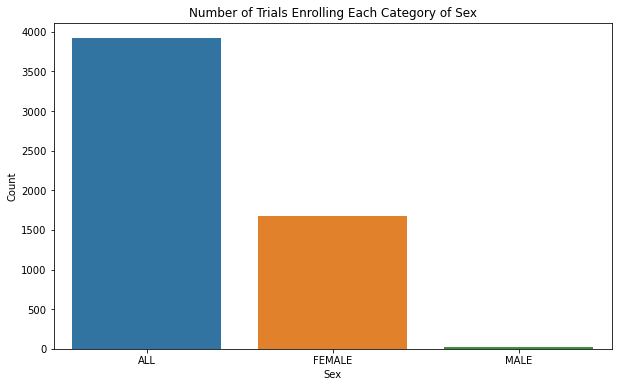

In [147]:
#Create a bar plot for the number of trials enrolling each category of sex
plt.figure(figsize=(10, 6))
sns.barplot(data=sexCount, x='Sex', y='Count')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Number of Trials Enrolling Each Category of Sex')
plt.show()


In [148]:
# Get the disease specific counts for breast cancer
breast_cancer_counts = breastDF['Sex'].value_counts().reset_index()
breast_cancer_counts.columns = ['Sex', 'Breast Cancer Count']

# Get the disease specific counts for Covid
covid_counts = covidDF['Sex'].value_counts().reset_index()
covid_counts.columns = ['Sex', 'Covid Count']

# Join the counts by sex for each condition
combined_counts = pd.merge(breast_cancer_counts, covid_counts, on='Sex', how='outer')
combined_counts.fillna(0, inplace=True)
combined_counts




,Sex,Breast Cancer Count,Covid Count
0,FEMALE,1650,22
1,ALL,1334,2586
2,MALE,11,14


In [149]:
melted_counts = combined_counts.melt(id_vars='Sex', var_name='Condition', value_name='Count')
melted_counts



,Sex,Condition,Count
0,FEMALE,Breast Cancer Count,1650
1,ALL,Breast Cancer Count,1334
2,MALE,Breast Cancer Count,11
3,FEMALE,Covid Count,22
4,ALL,Covid Count,2586
5,MALE,Covid Count,14


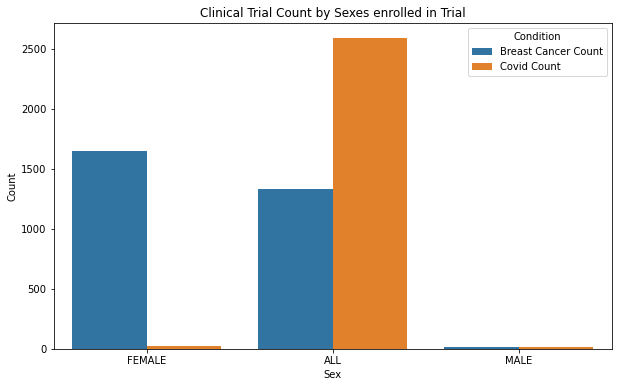

In [150]:
plt.figure(figsize=(10, 6))
sns.barplot(data=melted_counts, x='Sex', y='Count', hue='Condition')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Clinical Trial Count by Sexes enrolled in Trial')
plt.show()


In [151]:
# Group the combinedDF dataframe by Conditions, Status, and Sex
grouped_df = combinedDF.groupby(['Conditions', 'Status', 'Sex']).size().reset_index(name='Count')

# Create a dataframe for all sexes
all_sex_df = grouped_df[grouped_df['Sex'] == 'ALL']

# Create a dataframe for males only
male_df = grouped_df[grouped_df['Sex'] == 'MALE']

# Create a dataframe for females only
female_df = grouped_df[grouped_df['Sex'] == 'FEMALE']
#Break into 3 constituent dataframes, one for all sexes, one for males only and one for females only.


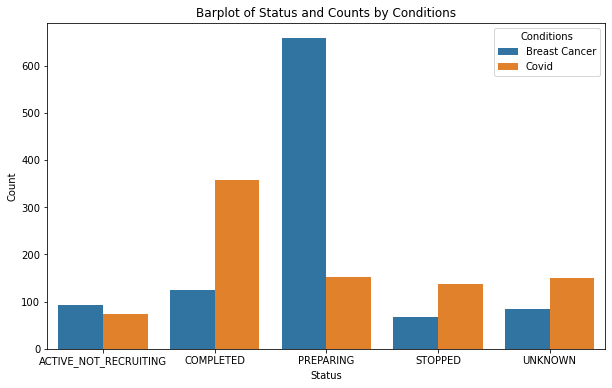

In [152]:
all_sex_df
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_df, x='Status', y='Count', hue='Conditions', ci=None)
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Barplot of Status and Counts by Conditions')
plt.show()


In [153]:
lines = combinedDF['Status'].unique()

In [170]:
#Create a dictionary that has 2 month increments starting from january of 2020 and ends on Jan 1 2023
months = pd.date_range(start='2020-01-01', end='2022-01-01', freq='4M')
months = months.strftime('%Y-%m-%d')
months
#For each time increment in months, count the number of studies whose start date is prior to the date grouped by the status column. Append the counts, condition and the status to a dictionary whose key is the date.
statusCounts1 = {}
statusCounts2 = {}

for month in months:
    temp_df = combinedDF[combinedDF['Start Date'] < month].groupby(['Conditions', 'Status']).size().reset_index(name='Count')
    for index, row in temp_df.iterrows():
        condition = row['Conditions']
        status = row['Status']
        count = row['Count']
        
        if condition == 'Breast Cancer':
            if month not in statusCounts1:
                statusCounts1[month] = []
            statusCounts1[month].append({'Status': status, 'Count': count})
        elif condition == 'Covid':
            if month not in statusCounts2:
                statusCounts2[month] = []
            statusCounts2[month].append({'Status': status, 'Count': count})


In [171]:
breastStatusCount = statusCounts1
covidStatusCount = statusCounts2
breastStatusCount


{'2020-01-31': [{'Status': 'ACTIVE_NOT_RECRUITING', 'Count': 120},
  {'Status': 'COMPLETED', 'Count': 145},
  {'Status': 'PREPARING', 'Count': 786},
  {'Status': 'STOPPED', 'Count': 75},
  {'Status': 'UNKNOWN', 'Count': 70}],
 '2020-05-31': [{'Status': 'ACTIVE_NOT_RECRUITING', 'Count': 120},
  {'Status': 'COMPLETED', 'Count': 145},
  {'Status': 'PREPARING', 'Count': 786},
  {'Status': 'STOPPED', 'Count': 79},
  {'Status': 'UNKNOWN', 'Count': 72}],
 '2020-09-30': [{'Status': 'ACTIVE_NOT_RECRUITING', 'Count': 120},
  {'Status': 'COMPLETED', 'Count': 145},
  {'Status': 'PREPARING', 'Count': 787},
  {'Status': 'STOPPED', 'Count': 80},
  {'Status': 'UNKNOWN', 'Count': 76}],
 '2021-01-31': [{'Status': 'ACTIVE_NOT_RECRUITING', 'Count': 120},
  {'Status': 'COMPLETED', 'Count': 145},
  {'Status': 'PREPARING', 'Count': 788},
  {'Status': 'STOPPED', 'Count': 81},
  {'Status': 'UNKNOWN', 'Count': 81}],
 '2021-05-31': [{'Status': 'ACTIVE_NOT_RECRUITING', 'Count': 120},
  {'Status': 'COMPLETED', 'Co

In [172]:
#Create a dataframe for the breastStatusCount dictionary where the columsn are the key[x][0][1] and the values are the key[x][1][1]
breastStatusCountDF = pd.DataFrame(breastStatusCount).T
breastStatusCountDF = breastStatusCountDF.fillna(0)
#Column labeled 0 is ACTIVE, 1 is COMPLETEED, 2 is PREPARING, 3 is STOPPED, 4 is UNKNOWN
breastStatusCountDF.columns = ['ACTIVE', 'COMPLETED', 'PREPARING', 'STOPPED', 'UNKNOWN']
#For the  ['ACTIVE', 'COMPLETED', 'PREPARING', 'STOPPED', 'UNKNOWN'] for the objects that are in the values, replace what's there with [1][1]
breastStatusCountDF

,ACTIVE,COMPLETED,PREPARING,STOPPED,UNKNOWN
2020-01-31,"{'Status': 'ACTIVE_NOT_RECRUITING', 'Count': 120}","{'Status': 'COMPLETED', 'Count': 145}","{'Status': 'PREPARING', 'Count': 786}","{'Status': 'STOPPED', 'Count': 75}","{'Status': 'UNKNOWN', 'Count': 70}"
2020-05-31,"{'Status': 'ACTIVE_NOT_RECRUITING', 'Count': 120}","{'Status': 'COMPLETED', 'Count': 145}","{'Status': 'PREPARING', 'Count': 786}","{'Status': 'STOPPED', 'Count': 79}","{'Status': 'UNKNOWN', 'Count': 72}"
2020-09-30,"{'Status': 'ACTIVE_NOT_RECRUITING', 'Count': 120}","{'Status': 'COMPLETED', 'Count': 145}","{'Status': 'PREPARING', 'Count': 787}","{'Status': 'STOPPED', 'Count': 80}","{'Status': 'UNKNOWN', 'Count': 76}"
2021-01-31,"{'Status': 'ACTIVE_NOT_RECRUITING', 'Count': 120}","{'Status': 'COMPLETED', 'Count': 145}","{'Status': 'PREPARING', 'Count': 788}","{'Status': 'STOPPED', 'Count': 81}","{'Status': 'UNKNOWN', 'Count': 81}"
2021-05-31,"{'Status': 'ACTIVE_NOT_RECRUITING', 'Count': 120}","{'Status': 'COMPLETED', 'Count': 145}","{'Status': 'PREPARING', 'Count': 793}","{'Status': 'STOPPED', 'Count': 84}","{'Status': 'UNKNOWN', 'Count': 85}"
2021-09-30,"{'Status': 'ACTIVE_NOT_RECRUITING', 'Count': 120}","{'Status': 'COMPLETED', 'Count': 145}","{'Status': 'PREPARING', 'Count': 795}","{'Status': 'STOPPED', 'Count': 86}","{'Status': 'UNKNOWN', 'Count': 87}"


In [173]:
breastStatusCountDF['ACTIVE'] = breastStatusCountDF['ACTIVE'].apply(lambda x: x['Count'])
breastStatusCountDF['COMPLETED'] = breastStatusCountDF['COMPLETED'].apply(lambda x: x['Count'])
breastStatusCountDF['PREPARING'] = breastStatusCountDF['PREPARING'].apply(lambda x: x['Count'])
breastStatusCountDF['STOPPED'] = breastStatusCountDF['STOPPED'].apply(lambda x: x['Count'])
breastStatusCountDF['UNKNOWN'] = breastStatusCountDF['UNKNOWN'].apply(lambda x: x['Count'])
breastStatusCountDF

,ACTIVE,COMPLETED,PREPARING,STOPPED,UNKNOWN
2020-01-31,120,145,786,75,70
2020-05-31,120,145,786,79,72
2020-09-30,120,145,787,80,76
2021-01-31,120,145,788,81,81
2021-05-31,120,145,793,84,85
2021-09-30,120,145,795,86,87


In [174]:
#Now repeat for the covidStatusCount
covidStatusCountDF = pd.DataFrame(covidStatusCount).T
covidStatusCountDF = covidStatusCountDF.fillna(0)
covidStatusCountDF.columns = ['ACTIVE', 'COMPLETED', 'PREPARING', 'STOPPED', 'UNKNOWN']
covidStatusCountDF


,ACTIVE,COMPLETED,PREPARING,STOPPED,UNKNOWN
2020-01-31,"{'Status': 'ACTIVE_NOT_RECRUITING', 'Count': 79}","{'Status': 'COMPLETED', 'Count': 306}","{'Status': 'PREPARING', 'Count': 173}","{'Status': 'STOPPED', 'Count': 119}","{'Status': 'UNKNOWN', 'Count': 140}"
2020-05-31,"{'Status': 'ACTIVE_NOT_RECRUITING', 'Count': 79}","{'Status': 'COMPLETED', 'Count': 306}","{'Status': 'PREPARING', 'Count': 174}","{'Status': 'STOPPED', 'Count': 127}","{'Status': 'UNKNOWN', 'Count': 144}"
2020-09-30,"{'Status': 'ACTIVE_NOT_RECRUITING', 'Count': 79}","{'Status': 'COMPLETED', 'Count': 306}","{'Status': 'PREPARING', 'Count': 175}","{'Status': 'STOPPED', 'Count': 133}","{'Status': 'UNKNOWN', 'Count': 160}"
2021-01-31,"{'Status': 'ACTIVE_NOT_RECRUITING', 'Count': 79}","{'Status': 'COMPLETED', 'Count': 306}","{'Status': 'PREPARING', 'Count': 175}","{'Status': 'STOPPED', 'Count': 142}","{'Status': 'UNKNOWN', 'Count': 166}"
2021-05-31,"{'Status': 'ACTIVE_NOT_RECRUITING', 'Count': 79}","{'Status': 'COMPLETED', 'Count': 306}","{'Status': 'PREPARING', 'Count': 175}","{'Status': 'STOPPED', 'Count': 149}","{'Status': 'UNKNOWN', 'Count': 171}"
2021-09-30,"{'Status': 'ACTIVE_NOT_RECRUITING', 'Count': 79}","{'Status': 'COMPLETED', 'Count': 306}","{'Status': 'PREPARING', 'Count': 175}","{'Status': 'STOPPED', 'Count': 157}","{'Status': 'UNKNOWN', 'Count': 181}"


In [175]:
covidStatusCountDF['ACTIVE'] = covidStatusCountDF['ACTIVE'].apply(lambda x: x['Count'])
covidStatusCountDF['COMPLETED'] = covidStatusCountDF['COMPLETED'].apply(lambda x: x['Count'])
covidStatusCountDF['PREPARING'] = covidStatusCountDF['PREPARING'].apply(lambda x: x['Count'])
covidStatusCountDF['STOPPED'] = covidStatusCountDF['STOPPED'].apply(lambda x: x['Count'])
covidStatusCountDF['UNKNOWN'] = covidStatusCountDF['UNKNOWN'].apply(lambda x: x['Count'])
covidStatusCountDF


,ACTIVE,COMPLETED,PREPARING,STOPPED,UNKNOWN
2020-01-31,79,306,173,119,140
2020-05-31,79,306,174,127,144
2020-09-30,79,306,175,133,160
2021-01-31,79,306,175,142,166
2021-05-31,79,306,175,149,171
2021-09-30,79,306,175,157,181


In [176]:
#Plot the two dataframes for covid and breast cancer on one line plot, with the x axis being date and y is the count of the status. Also aggregate the two DFs before plotting, and hue is condition
#Create a column that tells the condition
breastStatusCountDF['Condition'] = 'Breast Cancer'
covidStatusCountDF['Condition'] = 'Covid'

combinedStatusDF = pd.concat([breastStatusCountDF, covidStatusCountDF])
combinedStatusDF = combinedStatusDF.reset_index()
combinedStatusDF


,index,ACTIVE,COMPLETED,PREPARING,STOPPED,UNKNOWN,Condition
0,2020-01-31,120,145,786,75,70,Breast Cancer
1,2020-05-31,120,145,786,79,72,Breast Cancer
2,2020-09-30,120,145,787,80,76,Breast Cancer
3,2021-01-31,120,145,788,81,81,Breast Cancer
4,2021-05-31,120,145,793,84,85,Breast Cancer
5,2021-09-30,120,145,795,86,87,Breast Cancer
6,2020-01-31,79,306,173,119,140,Covid
7,2020-05-31,79,306,174,127,144,Covid
8,2020-09-30,79,306,175,133,160,Covid
9,2021-01-31,79,306,175,142,166,Covid


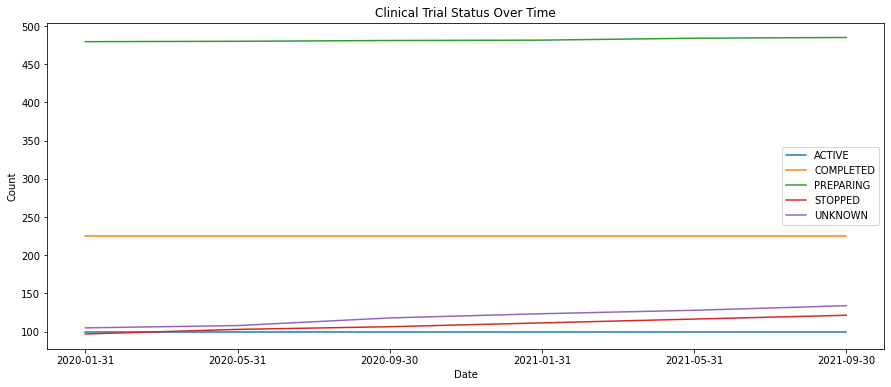

In [177]:
#plot the breastCancerStatusDF and the covidStatusDF on their own plots
plt.figure(figsize=(15, 6))
sns.lineplot(data=combinedStatusDF, x='index', y='ACTIVE', ci=None)
sns.lineplot(data=combinedStatusDF, x='index', y='COMPLETED', ci=None)
sns.lineplot(data=combinedStatusDF, x='index', y='PREPARING', ci=None)
sns.lineplot(data=combinedStatusDF, x='index', y='STOPPED', ci=None)
sns.lineplot(data=combinedStatusDF, x='index', y='UNKNOWN', ci=None)
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Clinical Trial Status Over Time')
plt.legend(['ACTIVE', 'COMPLETED', 'PREPARING', 'STOPPED', 'UNKNOWN'])
plt.show()



In [178]:
#Create a subdf of combined where the conditon is breast cancer
breastSubDF = combinedStatusDF[combinedStatusDF['Condition'] == 'Breast Cancer']
#Create a subdf of combined where the conditon is covid
covidSubDf = combinedStatusDF[combinedStatusDF['Condition'] == 'Covid']
breastSubDF

,index,ACTIVE,COMPLETED,PREPARING,STOPPED,UNKNOWN,Condition
0,2020-01-31,120,145,786,75,70,Breast Cancer
1,2020-05-31,120,145,786,79,72,Breast Cancer
2,2020-09-30,120,145,787,80,76,Breast Cancer
3,2021-01-31,120,145,788,81,81,Breast Cancer
4,2021-05-31,120,145,793,84,85,Breast Cancer
5,2021-09-30,120,145,795,86,87,Breast Cancer


In [179]:
#Redefine the columns to be deltas rather than just raw counts, that way we capture new studies in each time period
breastSubDF['ACTIVE_DELTA'] = breastSubDF['ACTIVE'].diff().fillna(0)
breastSubDF['COMPLETED_DELTA'] = breastSubDF['COMPLETED'].diff().fillna(0)
breastSubDF['PREPARING_DELTA'] = breastSubDF['PREPARING'].diff().fillna(0)
breastSubDF['STOPPED_DELTA'] = breastSubDF['STOPPED'].diff().fillna(0)
breastSubDF['UNKNOWN_DELTA'] = breastSubDF['UNKNOWN'].diff().fillna(0)
breastSubDF

C:\Users\gmvald\AppData\Local\Temp/ipykernel_17336/4181425496.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  breastSubDF['ACTIVE_DELTA'] = breastSubDF['ACTIVE'].diff().fillna(0)
C:\Users\gmvald\AppData\Local\Temp/ipykernel_17336/4181425496.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  breastSubDF['COMPLETED_DELTA'] = breastSubDF['COMPLETED'].diff().fillna(0)
C:\Users\gmvald\AppData\Local\Temp/ipykernel_17336/4181425496.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

,index,ACTIVE,COMPLETED,PREPARING,STOPPED,UNKNOWN,Condition,ACTIVE_DELTA,COMPLETED_DELTA,PREPARING_DELTA,STOPPED_DELTA,UNKNOWN_DELTA
0,2020-01-31,120,145,786,75,70,Breast Cancer,0.0,0.0,0.0,0.0,0.0
1,2020-05-31,120,145,786,79,72,Breast Cancer,0.0,0.0,0.0,4.0,2.0
2,2020-09-30,120,145,787,80,76,Breast Cancer,0.0,0.0,1.0,1.0,4.0
3,2021-01-31,120,145,788,81,81,Breast Cancer,0.0,0.0,1.0,1.0,5.0
4,2021-05-31,120,145,793,84,85,Breast Cancer,0.0,0.0,5.0,3.0,4.0
5,2021-09-30,120,145,795,86,87,Breast Cancer,0.0,0.0,2.0,2.0,2.0


In [ ]:
#Graph the deltas: ACTIVE_DELTA	COMPLETED_DELTA	PREPARING_DELTA	STOPPED_DELTA	UNKNOWN_DELTA
plt.figure(figsize=(15, 6))
sns.lineplot(data=breastSubDF, x='index', y='ACTIVE', ci=None)
sns.lineplot(data=breastSubDF, x='index', y='COMPLETED', ci=None)
sns.lineplot(data=breastSubDF, x='index', y='PREPARING', ci=None)
sns.lineplot(data=breastSubDF, x='index', y='STOPPED', ci=None)
sns.lineplot(data=breastSubDF, x='index', y='UNKNOWN', ci=None)
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Clinical Trial Status Over Time')
plt.legend(['ACTIVE', 'COMPLETED', 'PREPARING', 'STOPPED', 'UNKNOWN'])
plt.show()

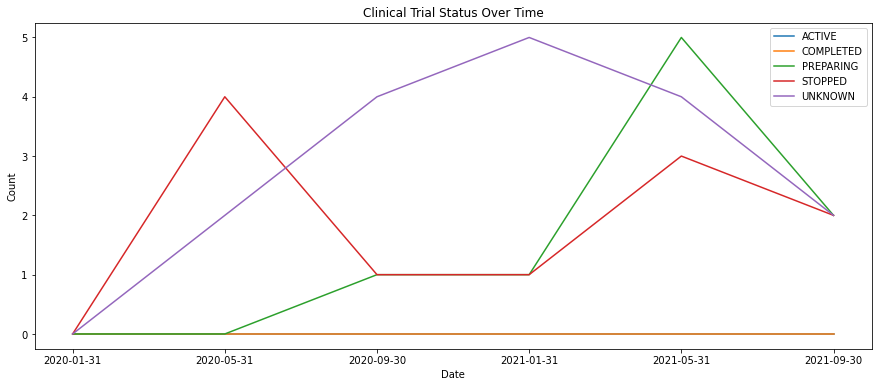

In [180]:
#Graph the deltas: ACTIVE_DELTA	COMPLETED_DELTA	PREPARING_DELTA	STOPPED_DELTA	UNKNOWN_DELTA
plt.figure(figsize=(15, 6))
sns.lineplot(data=breastSubDF, x='index', y='ACTIVE_DELTA', ci=None)
sns.lineplot(data=breastSubDF, x='index', y='COMPLETED_DELTA', ci=None)
sns.lineplot(data=breastSubDF, x='index', y='PREPARING_DELTA', ci=None)
sns.lineplot(data=breastSubDF, x='index', y='STOPPED_DELTA', ci=None)
sns.lineplot(data=breastSubDF, x='index', y='UNKNOWN_DELTA', ci=None)
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Clinical Trial Status Over Time')
plt.legend(['ACTIVE', 'COMPLETED', 'PREPARING', 'STOPPED', 'UNKNOWN'])
plt.show()
